In [1]:
import cv2

In [2]:
img = cv2.imread('/content/001.png')

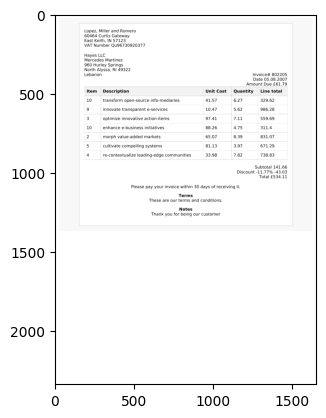

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
processed = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [10]:
!pip install pytesseract

In [11]:
import pytesseract

In [12]:
processed[1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
ocr_data = pytesseract.image_to_data(processed[1], output_type=pytesseract.Output.DATAFRAME)

In [14]:
ocr_data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1653,2339,-1,NaN
1,2,1,1,0,0,0,185,96,383,114,-1,NaN
2,3,1,1,1,0,0,186,96,323,56,-1,NaN
3,4,1,1,1,1,0,187,96,322,25,-1,NaN
4,5,1,1,1,1,1,187,97,79,24,96,"Lopez,"
...,...,...,...,...,...,...,...,...,...,...,...,...
176,5,1,10,1,2,2,695,1260,43,19,96,you
177,5,1,10,1,2,3,749,1254,35,20,96,for
178,5,1,10,1,2,4,795,1254,66,25,96,being
179,5,1,10,1,2,5,873,1260,41,14,96,our


In [17]:
ocr_data.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1653,2339,-1,NaN
1,2,1,1,0,0,0,185,96,383,114,-1,NaN
2,3,1,1,1,0,0,186,96,323,56,-1,NaN
3,4,1,1,1,1,0,187,96,322,25,-1,NaN
4,5,1,1,1,1,1,187,97,79,24,96,"Lopez,"
5,5,1,1,1,1,2,279,96,67,20,96,Miller
6,5,1,1,1,1,3,356,96,44,20,96,and
7,5,1,1,1,1,4,413,97,96,19,96,Romero
8,4,1,1,1,2,0,186,127,283,25,-1,NaN
9,5,1,1,1,2,1,186,128,79,19,96,60464


In [23]:
ocr_data[(ocr_data['line_num'] == 1) & (ocr_data['par_num'] == 1) & (ocr_data['block_num'] == 1)]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
3,4,1,1,1,1,0,187,96,322,25,-1,NaN
4,5,1,1,1,1,1,187,97,79,24,96,"Lopez,"
5,5,1,1,1,1,2,279,96,67,20,96,Miller
6,5,1,1,1,1,3,356,96,44,20,96,and
7,5,1,1,1,1,4,413,97,96,19,96,Romero


In [26]:
name = ''
for i in ocr_data[(ocr_data['line_num'] == 1) & (ocr_data['par_num'] == 1) & (ocr_data['block_num'] == 1)]['text']:
  if isinstance(i, str):
    name = name + ' ' + i
print(name)

 Lopez, Miller and Romero


In [56]:
def get_name_1(path):
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  processed = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  ocr_data = pytesseract.image_to_data(processed[1], output_type=pytesseract.Output.DATAFRAME)
  name = ''
  for i in ocr_data[(ocr_data['line_num'] == 1) & (ocr_data['par_num'] == 1) & (ocr_data['block_num'] == 1)]['text']:
    if isinstance(i, str):
      name = name + ' ' + i
      name = name.strip()
  return name

In [34]:
get_name_1('/content/002.png')

'Williams PLC'

In [60]:
# extracting zip file

In [61]:
import zipfile
import os

zip_path = '/content/invoices.zip'
extract_to = '/content/unzipped/'

# Create target directory if not exists
os.makedirs(extract_to, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f'Files unzipped to: {extract_to}')

Files unzipped to: /content/unzipped/


In [72]:
hundred = [0]
tens = [0,1,2,3,4,5,6,7,8,9]
units = [0,1,2,3,4,5,6,7,8,9]
images = []
for i in hundred:
  for j in tens:
    for k in units:
      name = str(i)+str(j)+str(k)
      images.append(name)

In [77]:
images.append('100')

In [78]:
len(images[1:])

100

In [80]:
images = images[1:]

In [89]:
readed_names = []
for i in images:
  iname = get_name_1(f'/content/unzipped/invoices/{i}.png')
  readed_names.append(iname)

In [90]:
import pandas as pd
dic = {'names':readed_names}
df = pd.DataFrame(dic)

In [91]:
df

,names
0,"Lopez, Miller and Romero"
1,Williams PLC
2,Williams-Johnson
3,Holt-Mercado
4,Garza-Norris
...,...
95,Taylor Inc
96,Cook-Wheeler
97,King LLC
98,"Moore, Phillips and Simpson"
